# Jamboree Business Case Study

## About Jamboree
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Problem Statement
Try to understand what factors are important in graduate admissions and how these factors are interrelated among themselves. Also predict the probability of admission of a student based on the given features.

## Column Profiling:

Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)

## Concept Used:

- Exploratory Data Analysis
- Linear Regression

## Import Libraries and Load Dataset

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the train test split
from sklearn.model_selection import train_test_split

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Importing the linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Import the metrics
from sklearn.metrics import r2_score

# Import the statsmodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the stats
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
# df = pd.read_csv('Jamboree_Admission.csv')
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
466,467,314,99,4,3.5,4.5,8.73,1,0.71
206,207,315,99,2,3.5,3.0,7.89,0,0.63
229,230,324,111,4,3.0,3.0,9.01,1,0.82
384,385,340,113,4,5.0,5.0,9.74,1,0.96
422,423,322,112,4,3.5,2.5,9.02,1,0.73


## Data Exploration and Cleaning:

In [ ]:
row, col = df.shape
print(f'There are {row} rows and {col} columns in the dataset')

There are 500 rows and 9 columns in the dataset


In [ ]:
columns = df.columns
print(f'The columns in the dataset are: {columns}')

The columns in the dataset are: Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


Observation:
- Since Serial No. is a unique row ID, we can drop it.
- Chance of Admit is the target variable which is having extra space in the column name. We can remove it.
- Similarly, we can remove extra space from other column names.

In [ ]:
df.drop('Serial No.', axis=1, inplace=True)
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [ ]:
df.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
346,304,97,2,1.5,2.0,7.64,0,0.47
283,321,111,3,2.5,3.0,8.90,1,0.80
472,327,116,4,4.0,4.5,9.48,1,0.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique values')
    if df[col].nunique() < 10:
        print(df[col].unique())

GRE Score: 49 unique values
TOEFL Score: 29 unique values
University Rating: 5 unique values
[4 3 2 5 1]
SOP: 9 unique values
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR: 9 unique values
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
CGPA: 184 unique values
Research: 2 unique values
[1 0]
Chance of Admit: 61 unique values


Observations:
- University Rating is having 5 unique values ranging from 1 to 5.
- SOP and LOR are having 9 unique values.
- Research Experience is having 2 unique values 0 and 1.
- GRE Scores, TOEFL Scores, CGPA and Chance of Admit are continuous variables.

Converting University Rating, SOP, LOR and Research Experience to categorical variables.

In [ ]:
# change the data type of the columns to category
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
con_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
df[cat_cols] = df[cat_cols].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Observations:<br>
On initial observation,
- The mean and 50% (median) values are almost same for GRE Scores, TOEFL Scores, CGPA and Chance of Admit which indicates that the data is normally distributed.
- There is a slight difference between the min and 25% values as well as 75% and max values for GRE Scores, TOEFL Scores, CGPA and Chance of Admit which indicates that there might be an outliers in the data.

In [ ]:
df.describe(include='category').T

,count,unique,top,freq
University Rating,500.0,5.0,3.0,162.0
SOP,500.0,9.0,4.0,89.0
LOR,500.0,9.0,3.0,99.0
Research,500.0,2.0,1.0,280.0


Observations:
- Most of the universities are having rating 3.
- Most of the students are having SOP and LOR rating 4 and 3.
- Most of the students do not have research experience.

In [ ]:
# check for missing values
missing = df.isna().sum()
print(f'The missing values in the dataset are: \n{missing}')

The missing values in the dataset are: 
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Observations:
- There are no missing values in the dataset.

In [ ]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f'The number of duplicates in the dataset are: {duplicates}')

The number of duplicates in the dataset are: 0


## Graphical Analysis

### Univariate Analysis

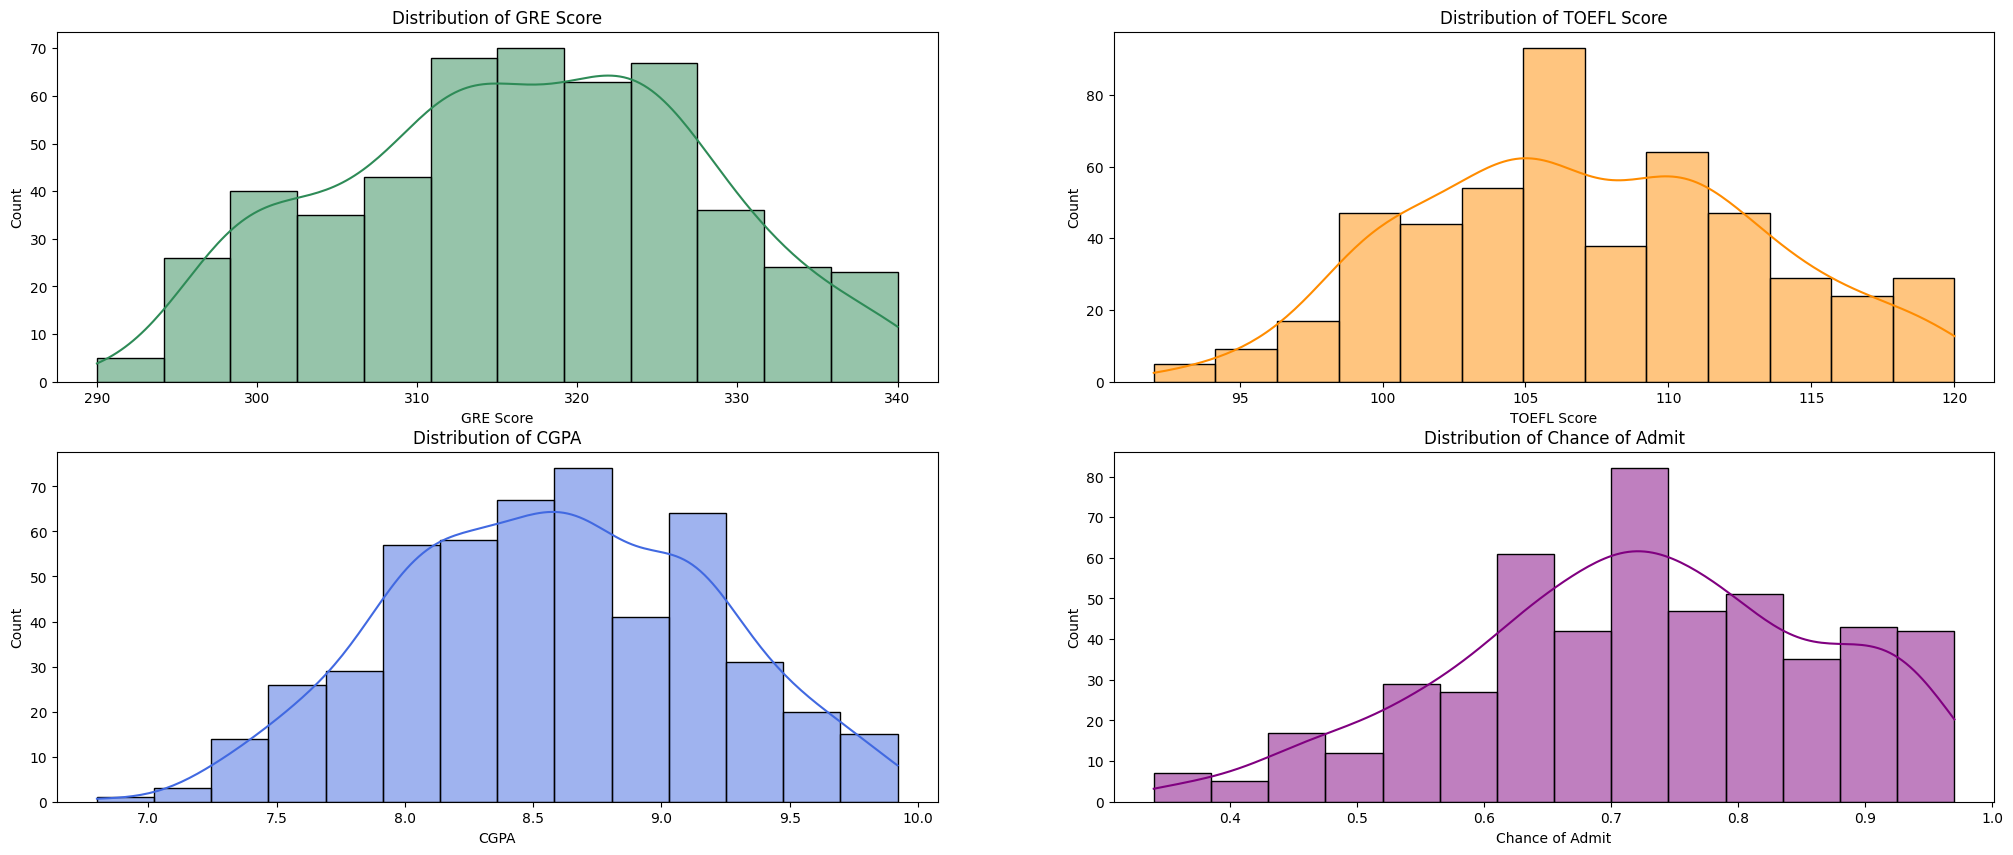

In [ ]:
# Analysing the continuous variables using histograms
color=['seagreen', 'darkorange', 'royalblue', 'purple']
plt.figure(figsize=(25, 10))
for i, col in enumerate(con_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color=color[i])
    plt.title(f'Distribution of {col}')
plt.show()

Observations:
- GRE Scores, TOEFL Scores, CGPA and Chance of Admit are normally distributed.
- Only Chance of Admit is having a slight right skewness.

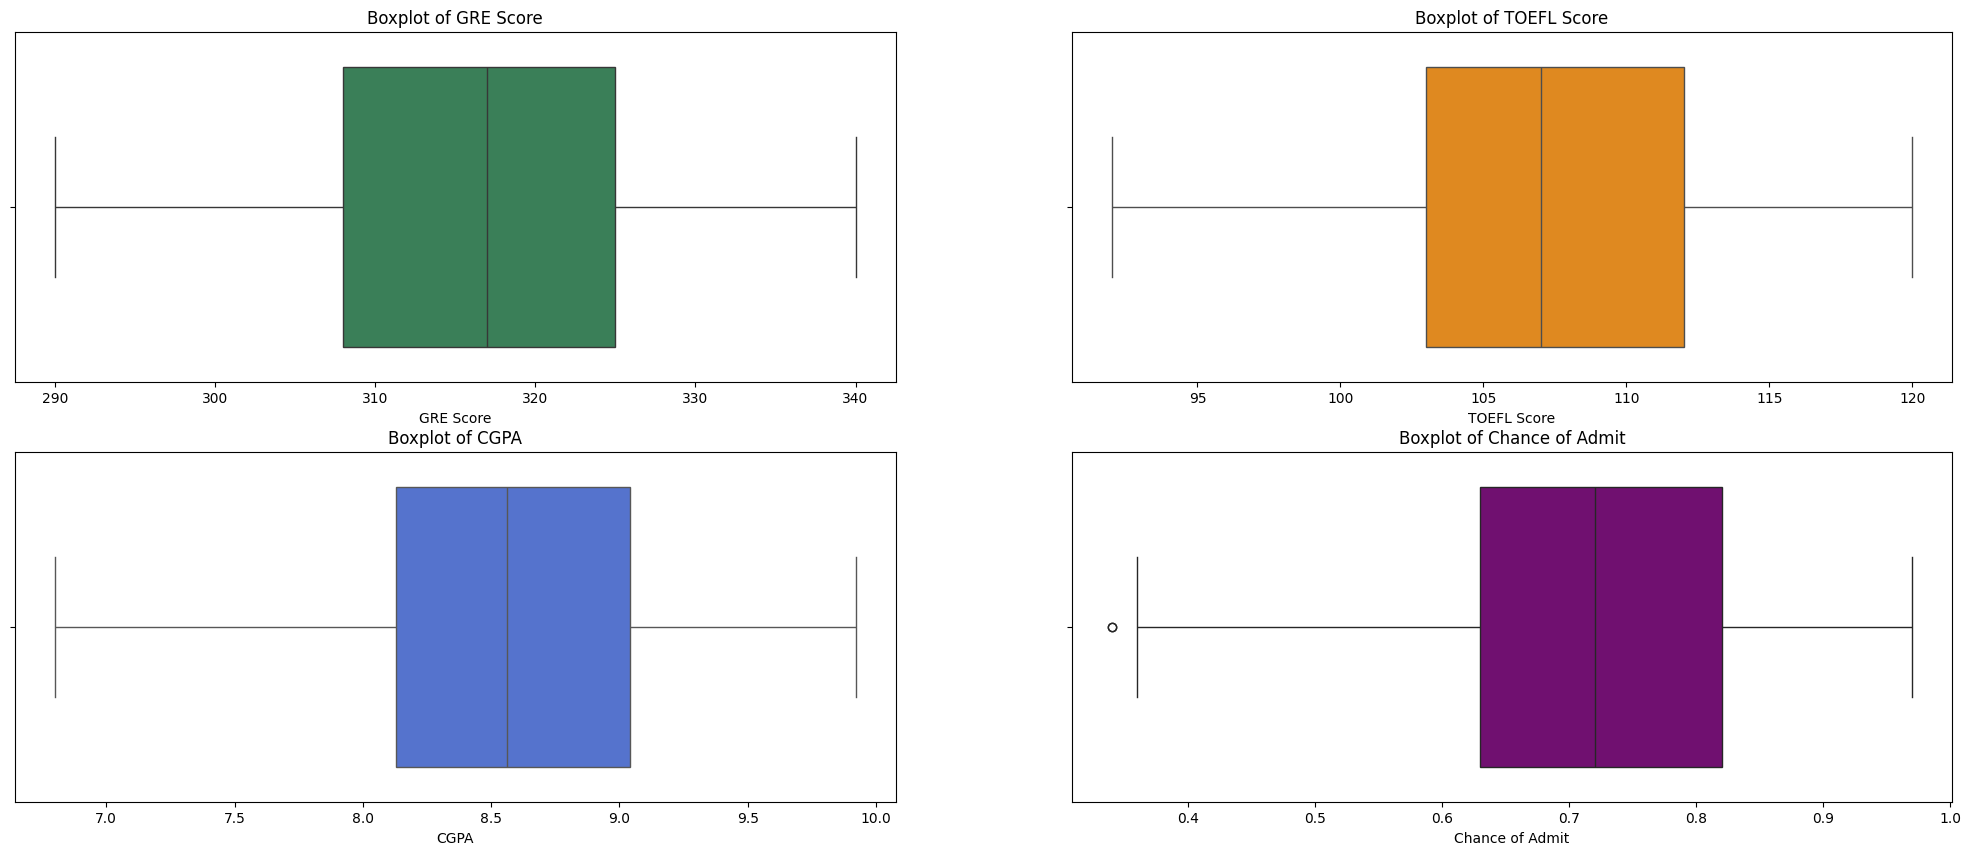

In [ ]:
# Analysing the continuous variables using boxplot
color=['seagreen', 'darkorange', 'royalblue', 'purple']
plt.figure(figsize=(25, 10))
for i, col in enumerate(con_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color=color[i])
    plt.title(f'Boxplot of {col}')
plt.show()

Observations:
- There are no significant outliers in the data.

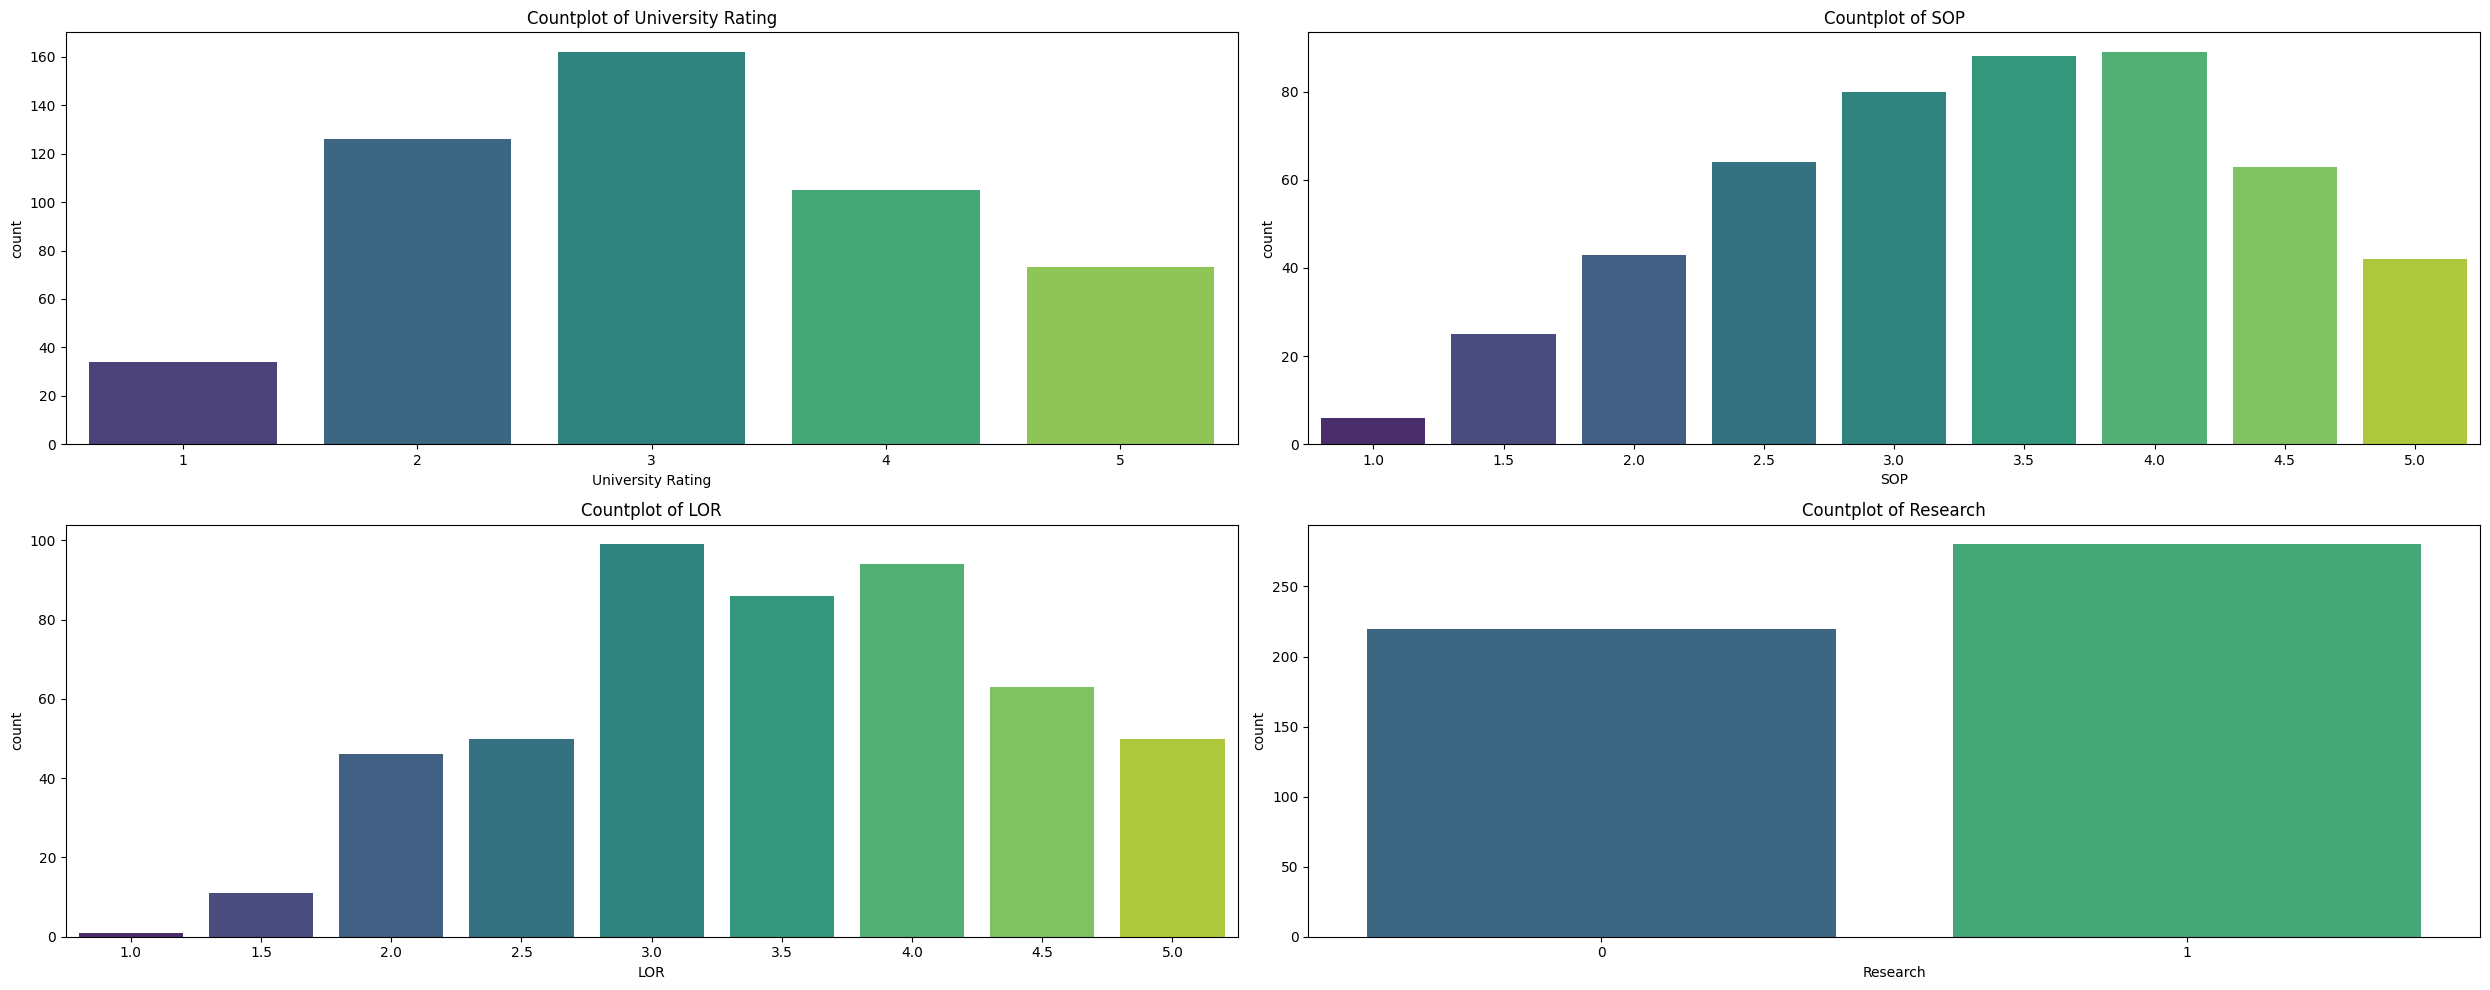

In [ ]:
# Analysing the categorical variables using countplot
plt.figure(figsize=(25, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


Observations:
- Most universities have a rating of 3.
- Most students have SOP and LOR ratings of 4 and 3.
- Most students do have the research experience.

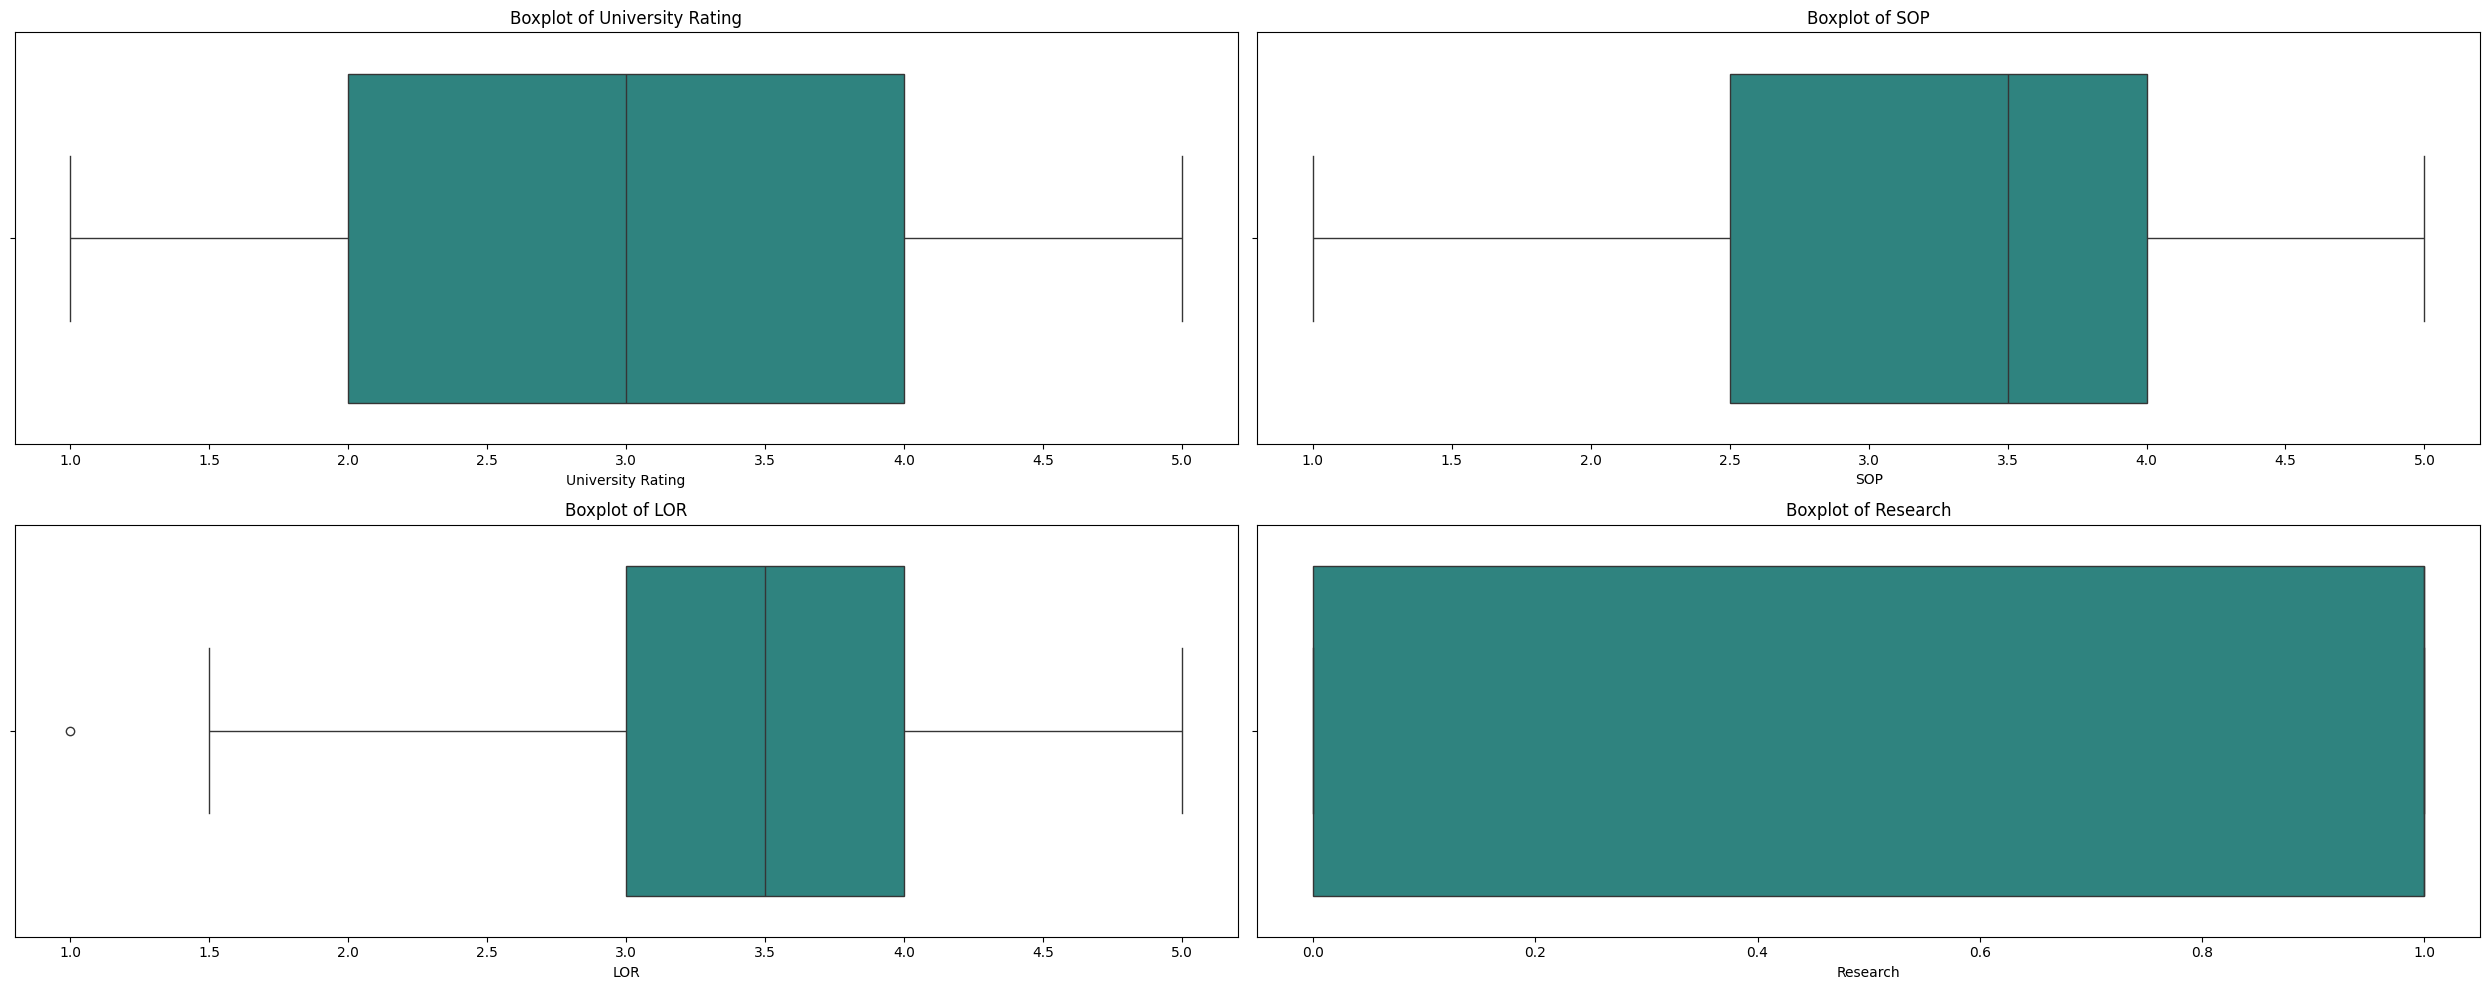

In [ ]:
# Analysing the categorical variables using boxplot
plt.figure(figsize=(25, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=col, data=df, palette='viridis')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Observations:
- There is no significant outliers when we consider the University Rating, SOP, LOR and Research Experience.

### Bivariate Analysis

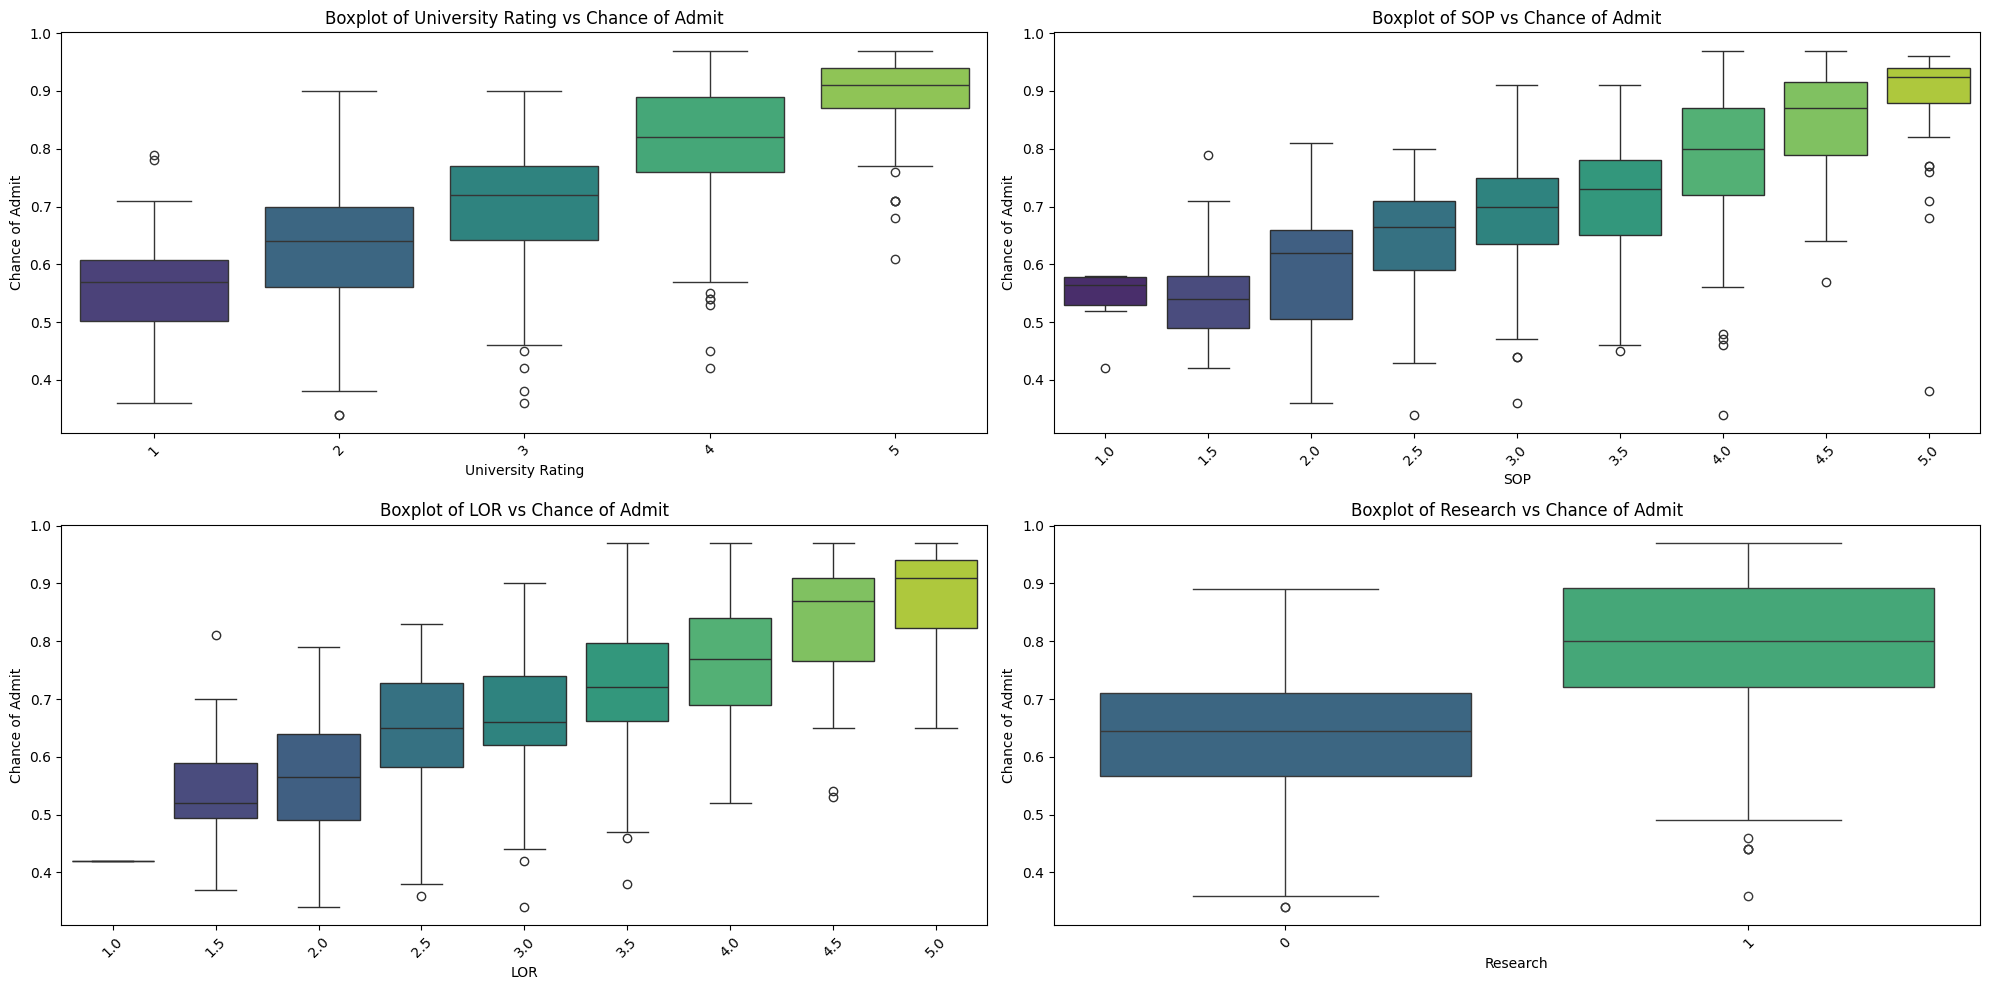

In [ ]:
# Analysing the relationship between the categorical variables and the target variable (Boxplot)
plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=col, y='Chance of Admit', data=df, palette='viridis')
    plt.title(f'Boxplot of {col} vs Chance of Admit')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:
- Although there are no outliers when considering the entire feature, outliers are present in the data when split based on their categories.

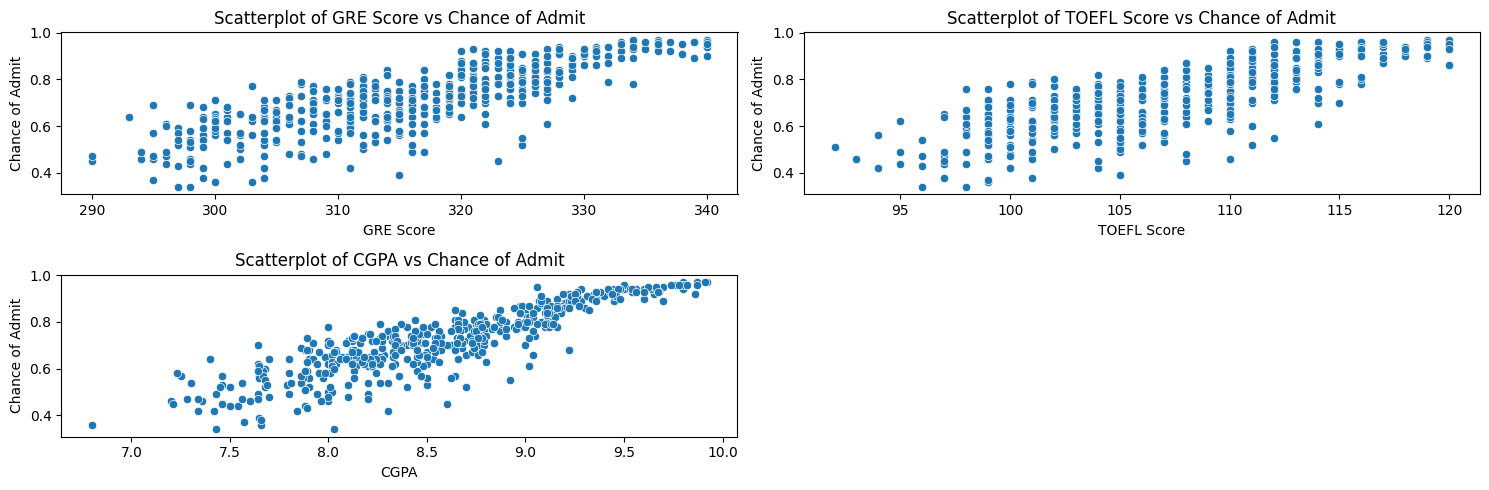

In [ ]:
# Analysing the target variable using scatter plot (Bivariate Analysis)
plt.figure(figsize=(15, 5))
for i, col in enumerate(con_cols[:-1]):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='Chance of Admit', data=df, palette='viridis')
    plt.title(f'Scatterplot of {col} vs Chance of Admit')
plt.tight_layout()
plt.show()

Observations:
- There is a positive correlation between GRE Scores, TOEFL Scores, CGPA and Chance of Admit.

### Multivariate Analysis

<Figure size 2000x1000 with 0 Axes>

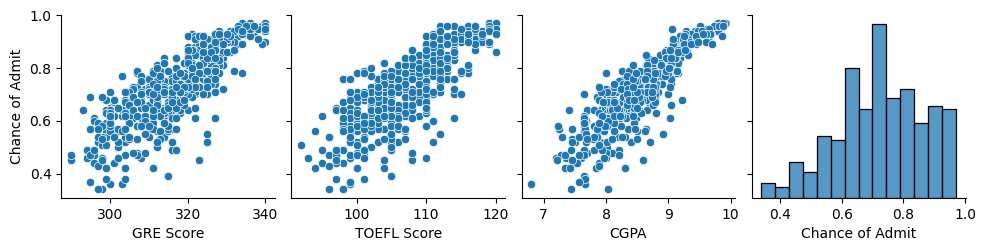

In [ ]:
# Multi-variate Analysis
plt.figure(figsize=(20, 10))
sns.pairplot(data=df, y_vars='Chance of Admit', palette='viridis')
plt.show()

Observations:
- The same positive correlation is observed between GRE Scores, TOEFL Scores, CGPA and Chance of Admit.

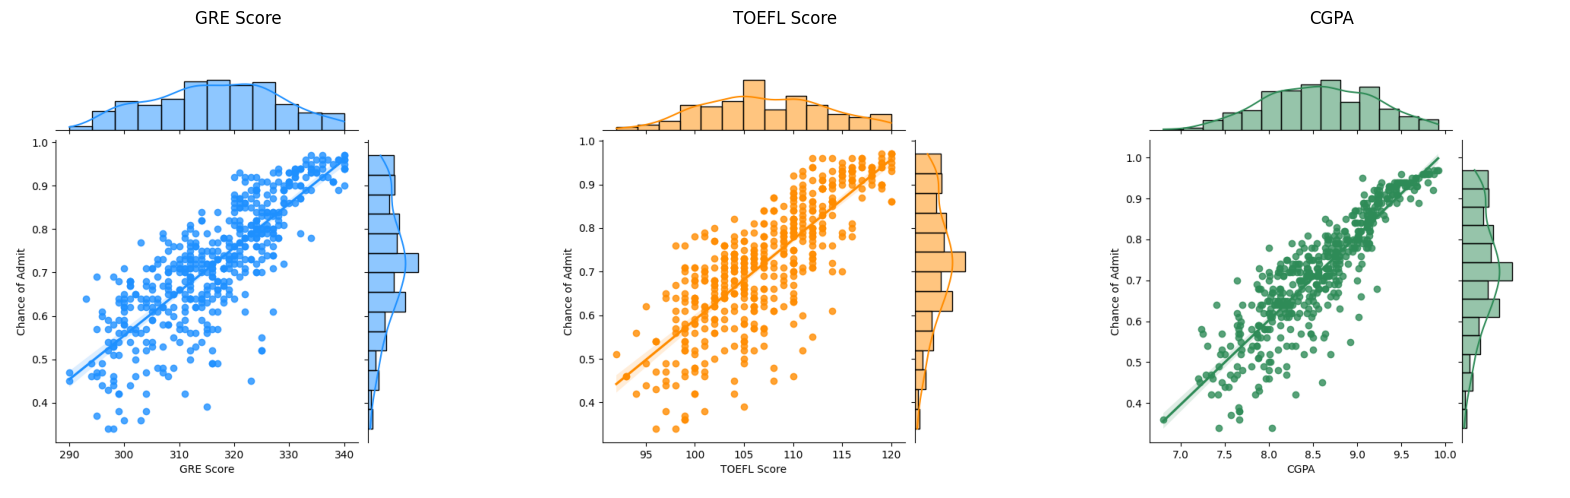

In [ ]:
# Jointplot for continuous variables
colors = ["dodgerblue", "darkorange", "seagreen"]
fig = plt.figure(figsize=(20, 10))

for i, col in enumerate(con_cols[:-1]):
    # Create a jointplot - Important Line of Code
    g = sns.jointplot(x=col, y="Chance of Admit", data=df, kind="reg", color=colors[i])

    # Done with the help of ChatGpt
    plot_ax = fig.add_subplot(1, 3, i + 1)
    plot_ax.set_title(col)

    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    g.fig.canvas.draw()
    plot_ax.imshow(g.fig.canvas.buffer_rgba())
    plot_ax.axis("off")
    plt.close(g.fig)
    # End of Suggestions by ChatGpt

plt.show()

Observations:
- Above jointplot confirms the positive correlation between GRE Scores, TOEFL Scores, CGPA and Chance of Admit.
- It also confirms that the data is normally distributed.

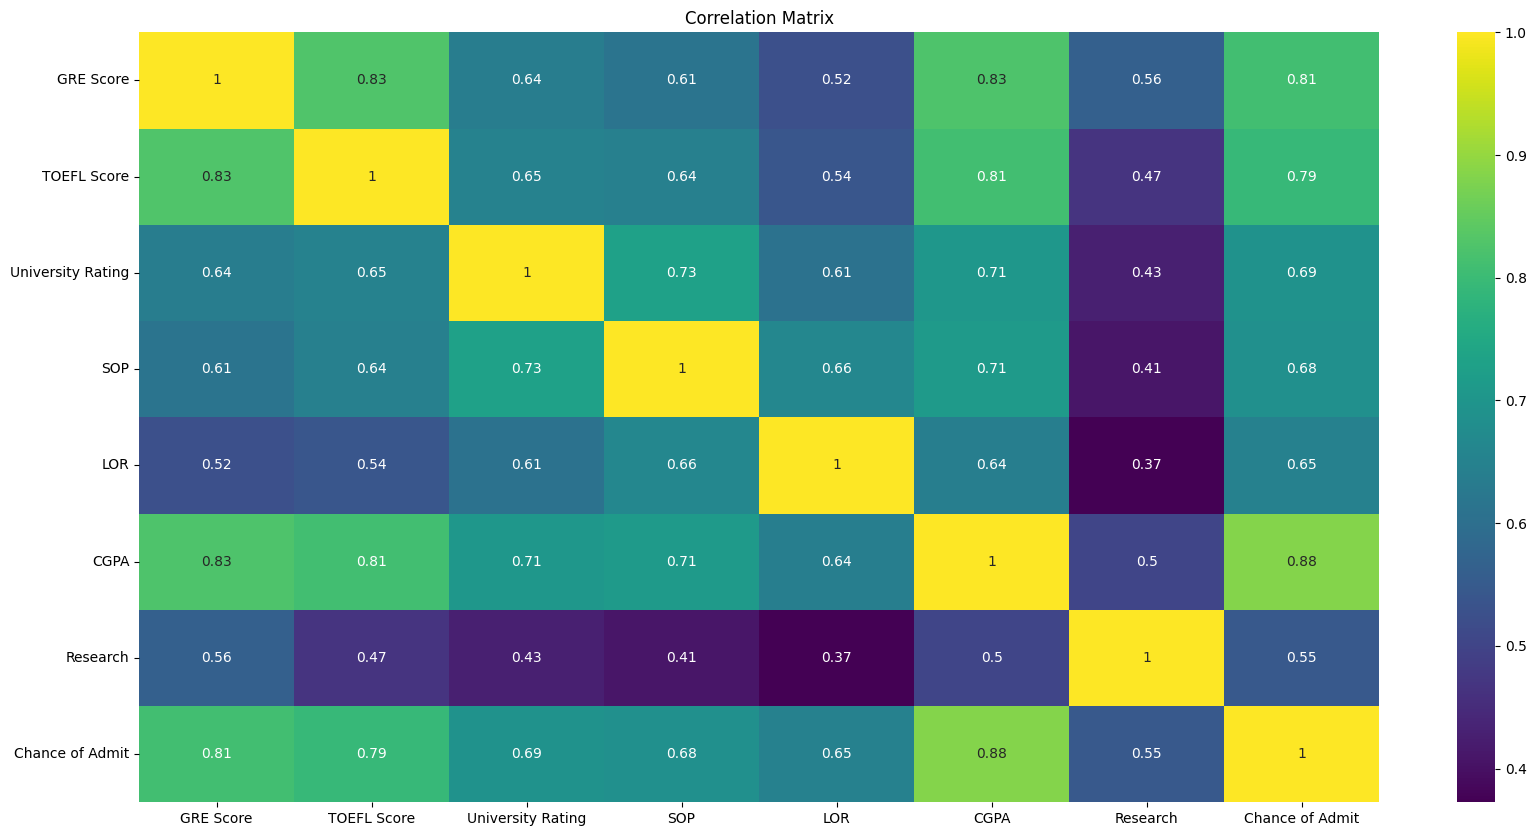

In [ ]:
# Correlation Matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

Observations:
- Correlation matrix confirms the positive correlation between GRE Scores, TOEFL Scores, CGPA and Chance of Admit.
- There is a moderate correlation between University Rating, SOP, LOR, Research Experience and Chance of Admit.
- There is no negative correlation between any of the features.
- There are also the correlation between the independent variables like TOEFL Scores and GRE Scores, CGPA and GRE Scores, CGPA and TOEFL Scores which indicates multicollinearity. This can be confirmed by VIF in further analysis.

In [ ]:
def scatterplot(df, con_cols, hue_col):
    plt.figure(figsize=(20, 5))
    ind = 1

    for col in con_cols[:-1]:
        plt.subplot(1, 3, ind)
        ind += 1
        sns.scatterplot(x=col, y='Chance of Admit', hue=hue_col, data=df, palette='viridis', s=100)
        plt.title(f'Scatterplot of {col} vs Chance of Admit with {hue_col}')
    plt.tight_layout()
    plt.show()

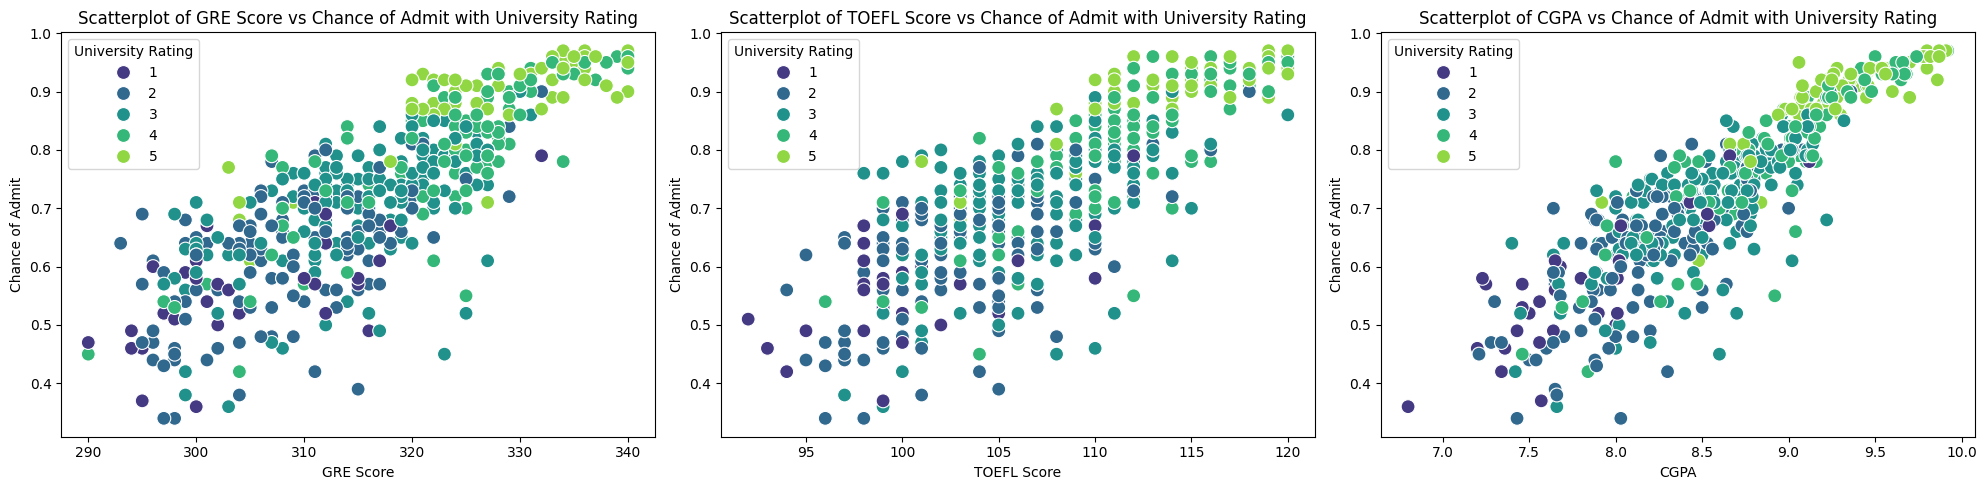

In [ ]:
scatterplot(df, con_cols, 'University Rating')

Observations:
- The scatter plot suggests that the Chance of Admit is higher for highly rated universities when applicants have high GRE scores, TOEFL scores, and CGPA.

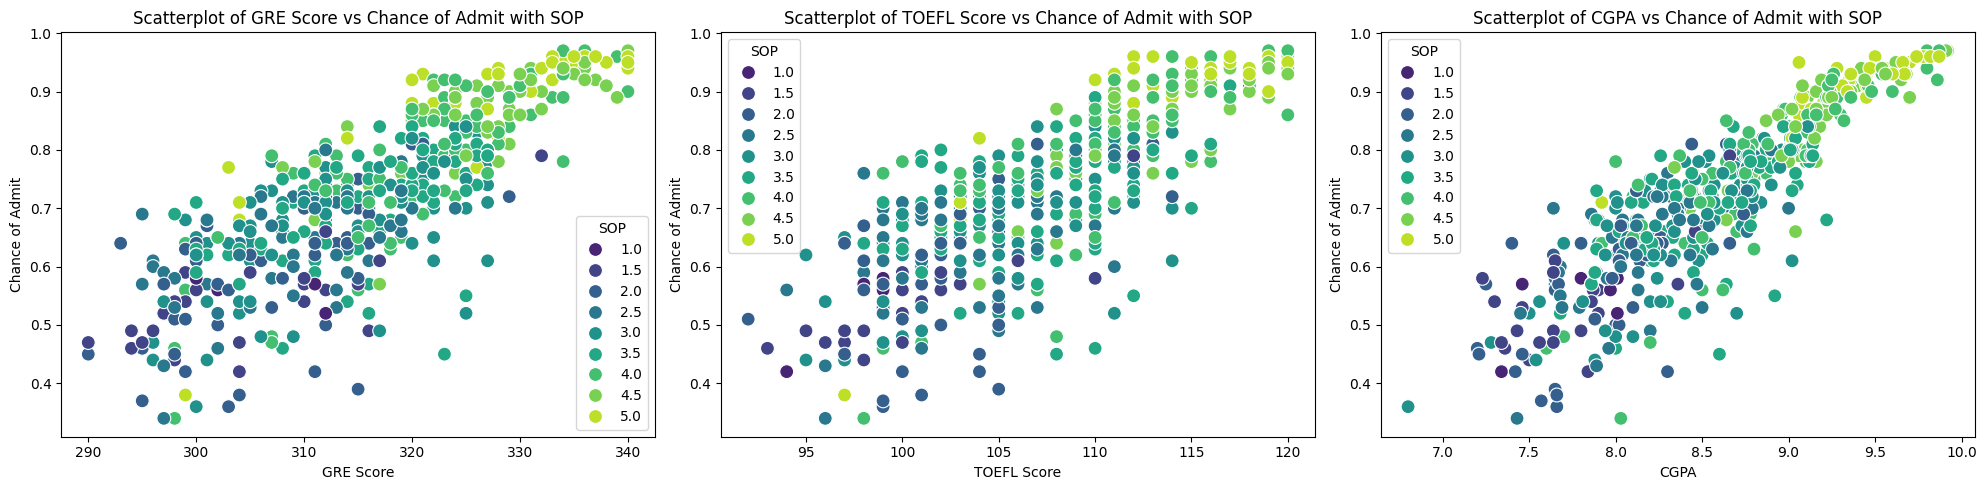

In [ ]:
scatterplot(df, con_cols, 'SOP')

Observations:
- The scatter plot suggests that the Chance of Admit is higher for applicants with high GRE scores, TOEFL scores, and CGPA when they have high SOP ratings.

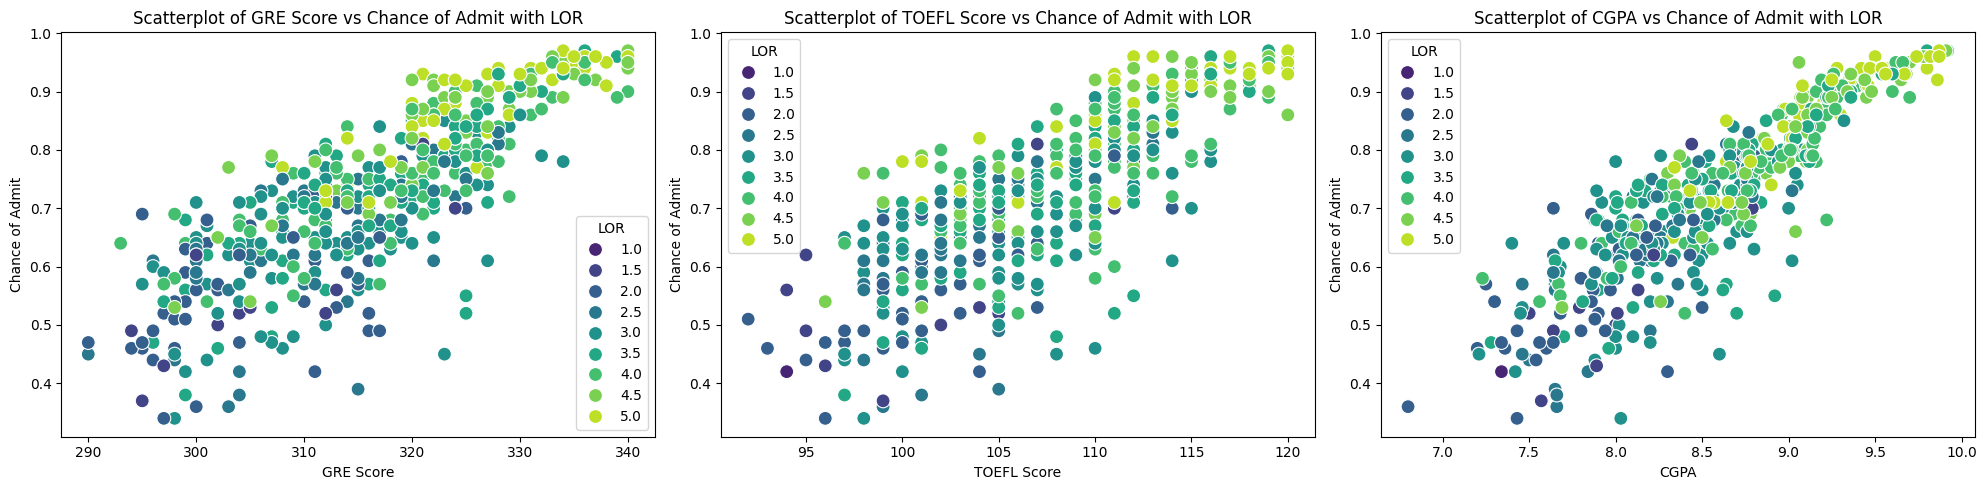

In [ ]:
scatterplot(df, con_cols, 'LOR')

Observations:
- The scatter plot suggests that the Chance of Admit is higher for applicants with high GRE scores, TOEFL scores, and CGPA when they have high LOR ratings.

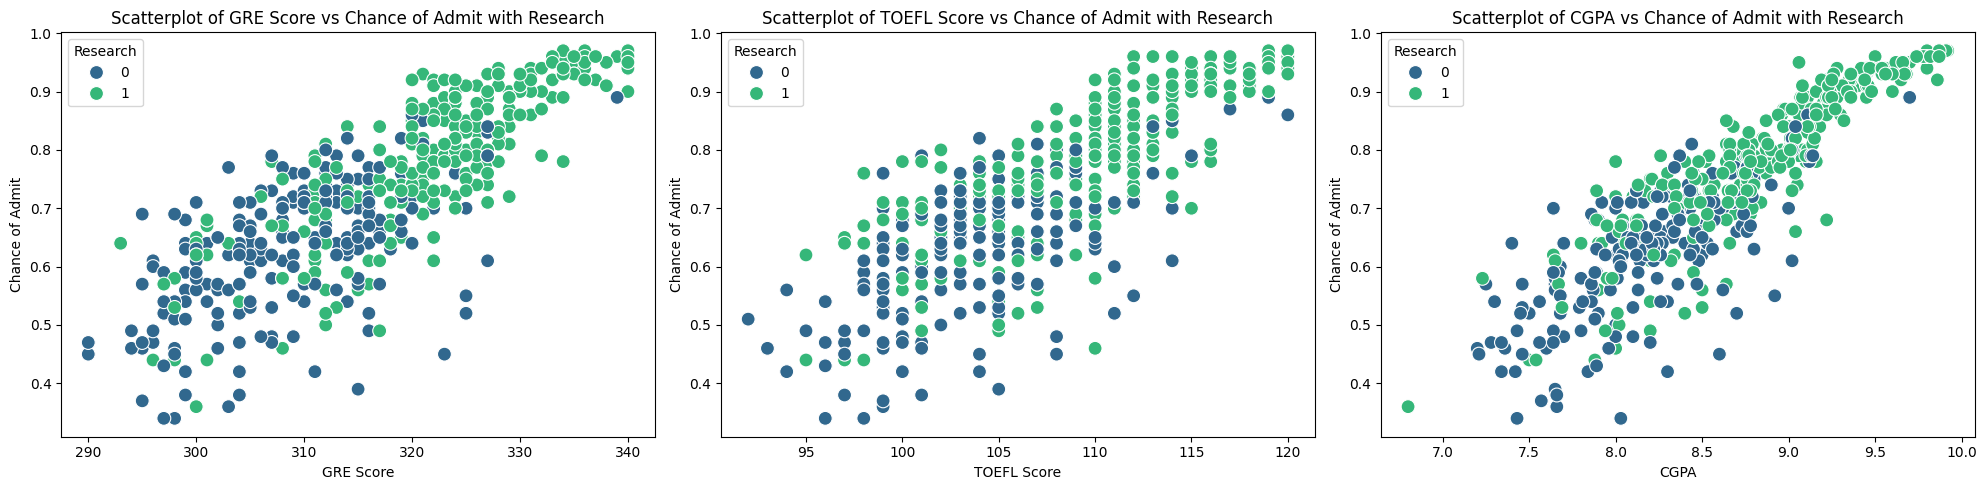

In [ ]:
scatterplot(df, con_cols, 'Research')

Observations:
- The scatter plot suggests that the Chance of Admit is higher for applicants with high GRE scores, TOEFL scores, and CGPA when they have research experience.

## Outlier Detection and Treatment

In [ ]:
# Outlier Detection using IQR
for i, col in enumerate(con_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    print(f'Outliers in {col}: {outliers.sum()}')

Outliers in GRE Score: 0
Outliers in TOEFL Score: 0
Outliers in CGPA: 0
Outliers in Chance of Admit: 2


In [ ]:
# Impute the outliers with the median
df["Chance of Admit"] = np.where(outliers, df["Chance of Admit"].median(), df["Chance of Admit"])

## Data Preprocessing and Model Building

In [ ]:
x = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'The shape of the training data is: {x_train.shape}')
print(f'The shape of the validation data is: {x_val.shape}')
print(f'The shape of the testing data is: {x_test.shape}')

The shape of the training data is: (320, 7)
The shape of the validation data is: (80, 7)
The shape of the testing data is: (100, 7)


In [ ]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
# Create a dataframe to store the adjusted R2 scores of the models for training, validation and testing
r2_scores = pd.DataFrame(columns=['Model', 'Train', 'Validation', 'Test'])
models = {'linear': None, 'lasso': None, 'ridge': None, 'elastic': None}

In [ ]:
# Adjusted R2 Score
def adj_r2_score(r2, x, y):
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# MAE, RMSE, R2, Adj R2
def get_metrics(y_true, y_pred, model_name):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adj_r2_score(r2, x_val, y_val)
    print_metrics(model_name, mae, rmse, r2, adj_r2)
    return adj_r2

def print_metrics(model_name, mae, rmse, r2, adj_r2):
    print(f'Model: {model_name.upper()}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')
    print(f'Adjusted R2: {adj_r2}')

In [ ]:
# Build the model
def build_model(model_name, x_train, y_train, x_val, y_val, alpha=0.01):
    model = None
    if model_name == 'linear':
        model = LinearRegression()
    elif model_name == 'lasso':
        model = Lasso(alpha=alpha)
    elif model_name == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_name == 'elastic':
        model = ElasticNet(alpha=alpha)
    models[model_name] = model

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_val)

    # Print the coefficients with the features as dataframe
    print(pd.DataFrame({"Column": df.columns[:-1], "Coefficient": model.coef_}))


    # Print the metrics
    adj_r2_train = get_metrics(y_train, y_pred_train, model_name + ' Train')
    print('-------------------------------------------------------')
    adj_r2_val = get_metrics(y_val, y_pred, model_name+ ' Validation')
    print('-------------------------------------------------------')
    adj_r2_test = get_metrics(y_test, model.predict(x_test), model_name + ' Test')

    r2_scores.loc[len(r2_scores)] = [model_name, adj_r2_train, adj_r2_val, adj_r2_test]

    return model

In [ ]:
build_model('linear', x_train, y_train, x_val, y_val)

              Column  Coefficient
0          GRE Score     0.020650
1        TOEFL Score     0.017938
2  University Rating    -0.000918
3                SOP     0.012414
4                LOR     0.014994
5               CGPA     0.064653
6           Research     0.015424
Model: LINEAR TRAIN
MAE: 0.04353387222382027
RMSE: 0.06124451821392407
R2: 0.809748744452964
Adjusted R2: 0.7912520946081132
-------------------------------------------------------
Model: LINEAR VALIDATION
MAE: 0.0398162298647047
RMSE: 0.05368936434511299
R2: 0.819156237867096
Adjusted R2: 0.8015742054375081
-------------------------------------------------------
Model: LINEAR TEST
MAE: 0.04228804725455805
RMSE: 0.06063132634000365
R2: 0.8202367856357937
Adjusted R2: 0.8027598064614959


LinearRegression()

In [ ]:
build_model('lasso', x_train, y_train, x_val, y_val)

              Column  Coefficient
0          GRE Score     0.020179
1        TOEFL Score     0.013896
2  University Rating     0.000000
3                SOP     0.009071
4                LOR     0.009714
5               CGPA     0.066691
6           Research     0.009343
Model: LASSO TRAIN
MAE: 0.04487387213600451
RMSE: 0.06256611077227409
R2: 0.8014493080595453
Adjusted R2: 0.7821457685653344
-------------------------------------------------------
Model: LASSO VALIDATION
MAE: 0.03988365151363367
RMSE: 0.05245821413657374
R2: 0.8273549972890433
Adjusted R2: 0.8105700664699225
-------------------------------------------------------
Model: LASSO TEST
MAE: 0.042415402690966914
RMSE: 0.061229464785266086
R2: 0.816672500836668
Adjusted R2: 0.7988489939735662


Lasso(alpha=0.01)

In [ ]:
build_model('ridge', x_train, y_train, x_val, y_val)

              Column  Coefficient
0          GRE Score     0.020653
1        TOEFL Score     0.017939
2  University Rating    -0.000916
3                SOP     0.012415
4                LOR     0.014995
5               CGPA     0.064646
6           Research     0.015424
Model: RIDGE TRAIN
MAE: 0.04353372217881337
RMSE: 0.061244518312597175
R2: 0.8097487438399236
Adjusted R2: 0.7912520939354717
-------------------------------------------------------
Model: RIDGE VALIDATION
MAE: 0.03981643815137261
RMSE: 0.053689763056617906
R2: 0.819153551869332
Adjusted R2: 0.8015712583010727
-------------------------------------------------------
Model: RIDGE TEST
MAE: 0.042288422715771656
RMSE: 0.06063161777955294
R2: 0.820235057478445
Adjusted R2: 0.8027579102888495


Ridge(alpha=0.01)

In [ ]:
build_model('elastic', x_train, y_train, x_val, y_val)

              Column  Coefficient
0          GRE Score     0.020711
1        TOEFL Score     0.016136
2  University Rating     0.000000
3                SOP     0.010847
4                LOR     0.012459
5               CGPA     0.064443
6           Research     0.012410
Model: ELASTIC TRAIN
MAE: 0.04374564040581328
RMSE: 0.061586179318080095
R2: 0.8076201371657799
Adjusted R2: 0.7889165393902307
-------------------------------------------------------
Model: ELASTIC VALIDATION
MAE: 0.03925360176493641
RMSE: 0.05277538656321868
R2: 0.8252609963872839
Adjusted R2: 0.8082724821471587
-------------------------------------------------------
Model: ELASTIC TEST
MAE: 0.04186141649856952
RMSE: 0.06058427092024775
R2: 0.8205157025458202
Adjusted R2: 0.8030658402933305


ElasticNet(alpha=0.01)

In [ ]:
r2_scores

,Model,Train,Validation,Test
0,linear,0.791252,0.801574,0.802760
1,lasso,0.782146,0.810570,0.798849
2,ridge,0.791252,0.801571,0.802758
3,elastic,0.788917,0.808272,0.803066


## Linear Regression Model - Assumptions

Assumptions:
- Linear relationship between independent & dependent variables
- No Multicolinearity
- Normality of Residuals
- Homoscedasticity
- No Auto-correlation

### Linearity Check

In [ ]:

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Adding an additonaL column which contributes to intercept (WO)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

#creating a model using Ordinary Least square me thod(OLS)
model = sm.OLS(y_train, x_train).fit()

#summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          2.07e-138
Time:                        17:28:06   Log-Likelihood:                 560.67
No. Observations:                 400   AIC:                            -1105.
Df Residuals:                     392   BIC:                            -1073.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3076      0.12

Observations:
- Here, we can see that the adjusted R-squared value is 0.805 and the p-value is less than 0.05 which indicates that the model is linear and significant.

### Multicollinearity Check

- From the above statistic

In [ ]:
def get_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

Process:
- Drop the column with the highest VIF value until all VIF values are less than 5.

In [ ]:
x_vif = x.copy()
y_vif = y.copy()

In [ ]:
# VIF
vif = get_vif(x_vif)
vif

,Features,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
5,CGPA,950.817985
3,SOP,35.265006
4,LOR,30.911476
2,University Rating,20.933361
6,Research,2.869493


Observations:
- Dropping SOP as it's having high p-value and VIF value.

In [ ]:
# Drop the columns with high VIF
x_vif.drop(['SOP'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     362.7
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.10e-177
Time:                        17:28:06   Log-Likelihood:                 699.76
No. Observations:                 500   AIC:                            -1386.
Df Residuals:                     493   BIC:                            -1356.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2125      0.10

Observations:
- The p-value is less than 0.05 and the adjusted R-squared value increased to 0.813 which indicates that the model is significant.
- Still there is multicollinearity between the independent variables. Hence, we can drop GRE Score.

In [ ]:
vif_backup = vif.copy()

In [ ]:
# Drop the columns with high VIF
x_vif_copy = x_vif.copy()
x_vif.drop(['GRE Score'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
3,CGPA,718.829136
0,TOEFL Score,637.685476
2,LOR,27.314036
1,University Rating,15.341917
4,Research,2.842747


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     423.8
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          4.40e-176
Time:                        17:28:06   Log-Likelihood:                 693.95
No. Observations:                 500   AIC:                            -1376.
Df Residuals:                     494   BIC:                            -1351.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9287      0.06

Observations:
- Adjusted R-squared value is 0.809 which is decreasing when we drop GRE Score.
- Hence, not dropping GRE Score.

In [ ]:
vif_backup

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
# drop the columns with 2nd highest VIF - TOEFL Score
x_vif = x_vif_copy.copy()
x_vif.drop(['TOEFL Score'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
3,CGPA,818.909954
0,GRE Score,663.269292
2,LOR,28.094097
1,University Rating,16.990770
4,Research,2.852675


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     427.2
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          9.13e-177
Time:                        17:28:06   Log-Likelihood:                 695.54
No. Observations:                 500   AIC:                            -1379.
Df Residuals:                     494   BIC:                            -1354.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2315      0.10

Observations:
- Even here, the adjusted R-squared value is 0.810 which is decreasing when we drop TOEFL Score.

In [ ]:
vif_backup

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
# Drop the columns with 3rd high VIF
x_vif = x_vif_copy.copy()
x_vif.drop(['CGPA'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
1,TOEFL Score,1079.610017
0,GRE Score,985.688733
3,LOR,25.744621
2,University Rating,15.944737
4,Research,2.825525


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     306.6
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          6.89e-149
Time:                        17:28:06   Log-Likelihood:                 630.46
No. Observations:                 500   AIC:                            -1249.
Df Residuals:                     494   BIC:                            -1224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4163      0.11

Observations:
- The adjusted R-squared value drastically decreased to 0.754 when we drop CGPA.
- Hence, not dropping CGPA.

In [ ]:
vif_backup

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
# Drop the columns with 4th highest VIF
x_vif = x_vif_copy.copy()
x_vif.drop(['LOR'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
0,GRE Score,1215.448725
1,TOEFL Score,1201.939120
3,CGPA,835.455157
2,University Rating,15.761503
4,Research,2.831859


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     417.4
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          9.12e-175
Time:                        17:28:06   Log-Likelihood:                 690.87
No. Observations:                 500   AIC:                            -1370.
Df Residuals:                     494   BIC:                            -1344.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2310      0.10

Observations:
- Here also, the adjusted R-squared value decreased to 0.807 when we drop LOR
- Hence, not dropping LOR.

In [ ]:
vif_backup

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
# Drop the columns with 5th highest VIF
x_vif = x_vif_copy.copy()
x_vif.drop(['University Rating'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
1,TOEFL Score,1172.511010
0,GRE Score,1101.201710
3,CGPA,834.623282
2,LOR,25.423429
4,Research,2.726207


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     431.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          1.01e-177
Time:                        17:28:06   Log-Likelihood:                 697.77
No. Observations:                 500   AIC:                            -1384.
Df Residuals:                     494   BIC:                            -1358.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2735      0.099    -12.806      

Observations:
- Even here, the adjusted R-squared value is 0.812 which is a slight decrease when we drop University Rating.
- Hence, not dropping University Rating.

In [ ]:
vif_backup

,Features,VIF
0,GRE Score,1251.258179
1,TOEFL Score,1202.994286
4,CGPA,912.499865
3,LOR,28.118760
2,University Rating,17.432500
5,Research,2.854161


In [ ]:
# Drop the columns with 6th highest VIF
x_vif = x_vif_copy.copy()
x_vif.drop(['Research'], axis=1, inplace=True)
vif = get_vif(x_vif)
vif

,Features,VIF
0,GRE Score,1246.253994
1,TOEFL Score,1202.367893
4,CGPA,903.344683
3,LOR,27.899042
2,University Rating,16.650986


In [ ]:
model = sm.OLS(y_vif, sm.add_constant(x_vif)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     422.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          6.99e-176
Time:                        17:28:06   Log-Likelihood:                 693.48
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     494   BIC:                            -1350.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3592      0.09

Observations:
- The adjusted R-squared value is 0.809 which is decreasing when we drop Research Experience.
- Hence, not dropping Research Experience.

In [ ]:
x_vif = x_vif_copy.copy()

In [ ]:
# Check the adjusted R2 score for the sklearn linear regression model
x_train, x_test, y_train, y_test = train_test_split(x_vif_copy, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
adj_r2 = adj_r2_score(r2, x_test, y_test)
print(f'The adjusted R2 score for the sklearn linear regression model is: {adj_r2}')

The adjusted R2 score for the sklearn linear regression model is: 0.8103985092535371


Observations:
- After dropping the column "SOR", the adjusted R-squared value slightly increased to 0.810 from 8.02.

### Normality of Residuals

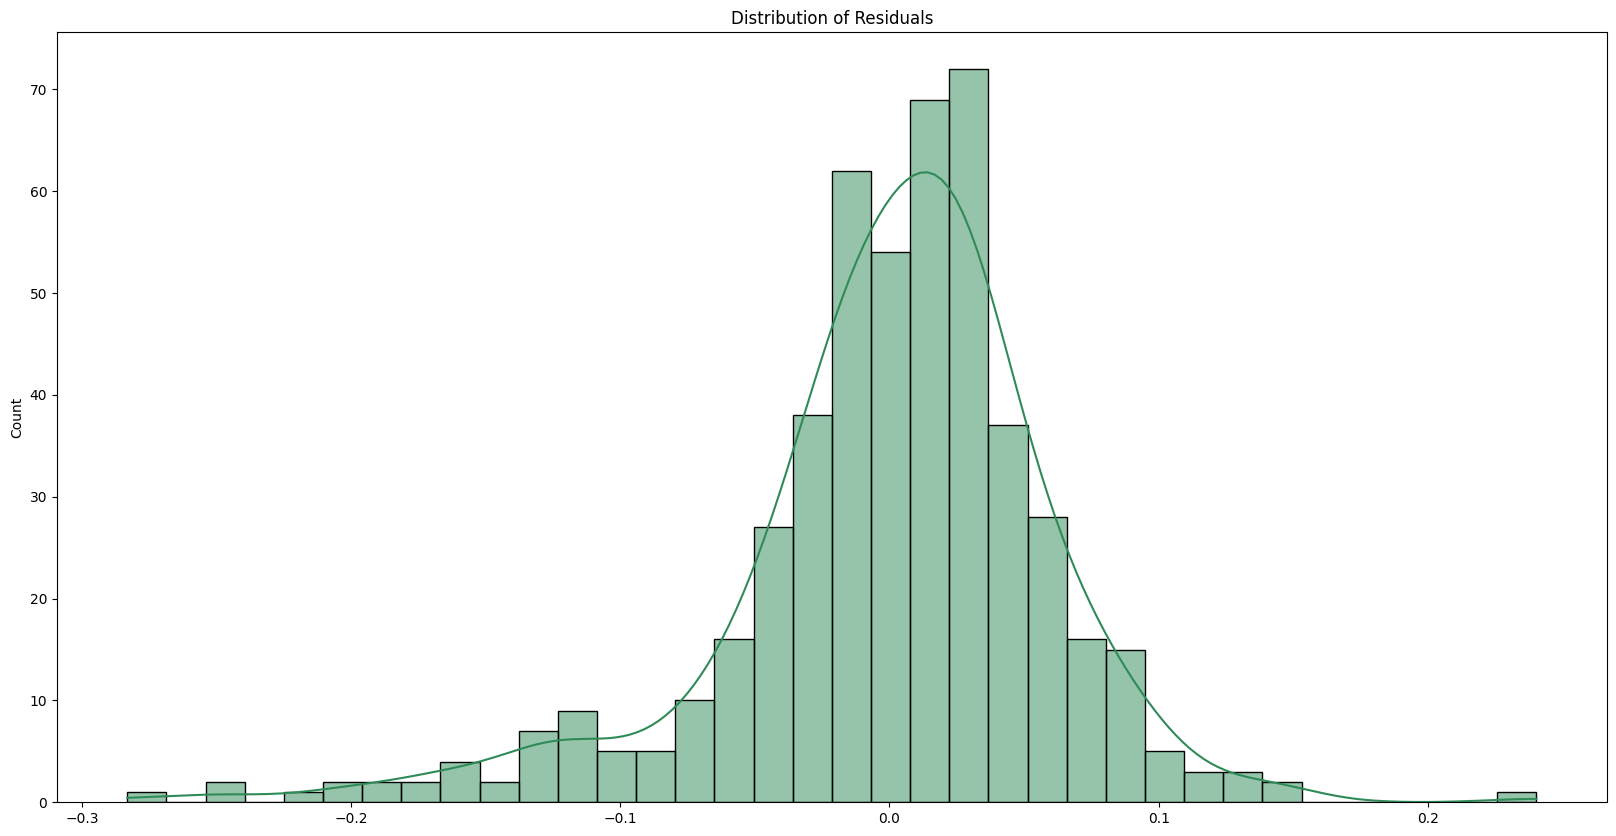

In [ ]:
# Normality of Residuals
residuals = model.resid
plt.figure(figsize=(20, 10))
sns.histplot(residuals, kde=True, color='seagreen')
plt.title('Distribution of Residuals')
plt.show()


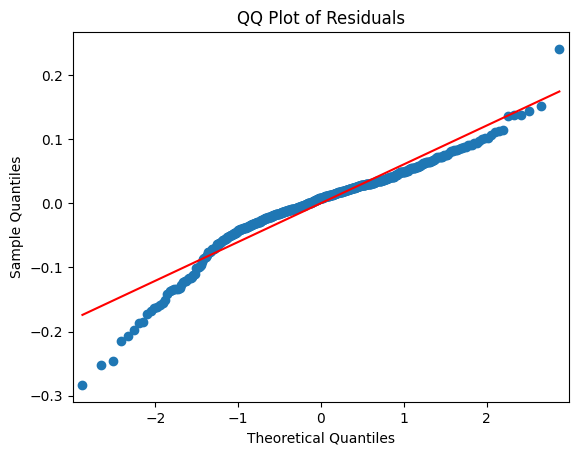

In [ ]:
# QQ Plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

Observations:
- The residuals are normally distributed with a slight right skewness.

### Homoscedasticity

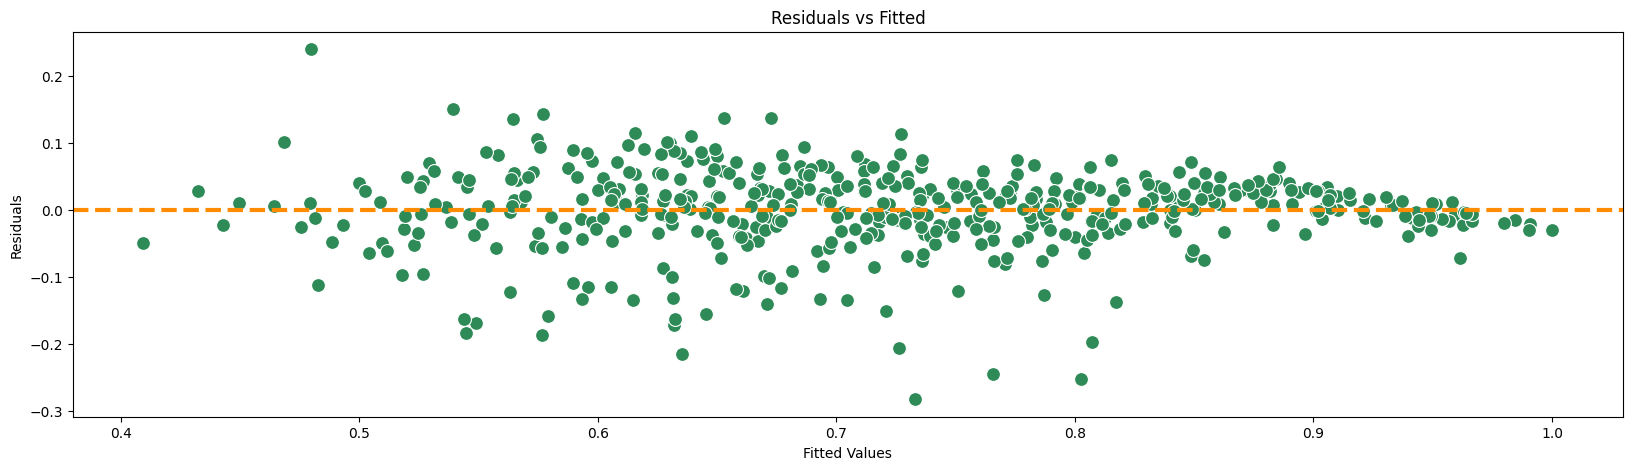

In [ ]:
# Homoscedasticity
plt.figure(figsize=(20, 5))
sns.scatterplot(x=model.fittedvalues, y=residuals, color='seagreen', s=100)
plt.axhline(y=0, color='darkorange', linestyle='--', linewidth=3)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


Observations:
- There is no pattern in the residuals which indicates that the residuals are homoscedastic.
- Satisfying the homoscedasticity assumption.

## Actionable Insights & Recommendations

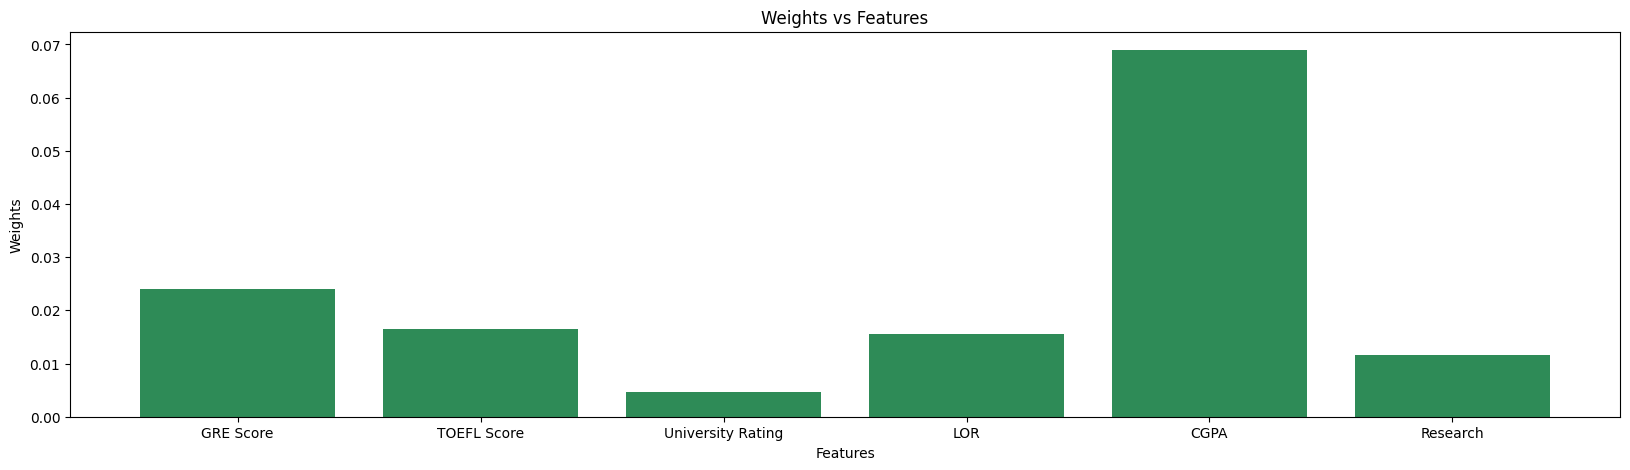

In [ ]:
# Weights vs Features
weights = linear_model.coef_
features = x_vif.columns
plt.figure(figsize=(20, 5))
plt.bar(features, weights, color='seagreen')
plt.title('Weights vs Features')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.show()

Insights:
1. The most iportant Feature in predicting the chance of Getting admission is CGPA
2. There is no much dependency on the SOP as it is having high p-value and VIF value.
3. The model is significant and the adjusted R-squared value is 0.810 which indicates that the model is able to explain 81% of the variance in the data.

Recommendations:
1. Students should focus on their CGPA to increase their chances of admission.
2. Students should also improve their GRE Scores, TOEFL Scores, and LOR ratings to enhance their admission prospects.
3. Having research experience can significantly boost students' chances of admission.
4. Although University Rating has a positive correlation with the Chance of Admit, it is not the most critical factor, so students should not overly stress about it.